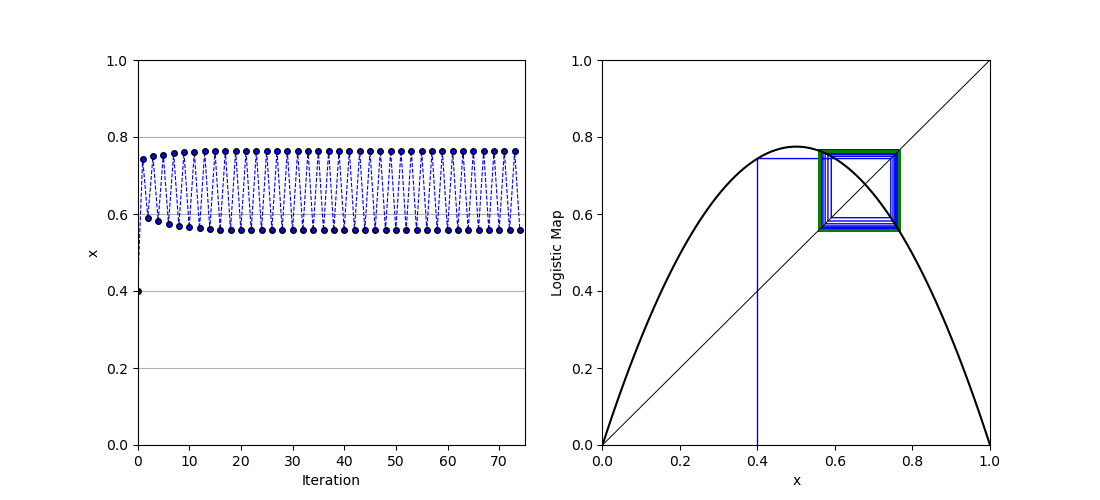

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import nbconvert
from IPython.display import clear_output



def logistic_map(x, a):
    return a * x * (1 - x) #- 0.1 * a * (1 / (60 * np.pi) * np.sin(20 * np.pi * (np.exp(x))))

def orbit(ax, num_iterations, a, initial_value):
    orb = [initial_value, logistic_map(initial_value,a)]

    for i in range(3, num_iterations + 1):
        orb.append(logistic_map(orb[-1],a))
        
    ax.clear()
    line, = ax.plot(range(num_iterations), orb, 'o', markersize=4, linestyle='dashed', linewidth=0.8, color='blue', markeredgecolor='black')
    ax.set_xlim(0, num_iterations)
    ax.set_xlabel('Iteration')
    ax.set_ylim(0, 1)
    ax_orbit.set_ylabel('x')
    ax.grid(visible=True, axis='y')

def cobweb_plot(ax, num_iterations, a, initial_value, transient=True):
    cobweb = [[initial_value, 0]]

    for i in range(1, 2 * num_iterations + 1):
        x_prev = cobweb[-1][0]
        x_next = logistic_map(x_prev, a)
        cobweb.extend([[x_prev, x_next], [x_next, x_next]])

    cobweb = np.array(cobweb)
    ax.clear()  # Clear the previous cobweb plot
    if transient == True:
        ax.plot(cobweb[:, 0], cobweb[:, 1], 'b-', linewidth=1)
    ax.plot(cobweb[-50:, 0], cobweb[-50:, 1], '-', linewidth=2, color='green')
    ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='black', linewidth=0.7)
    ax.plot(np.linspace(0, 1, 100), logistic_map(np.linspace(0, 1, 100), a), color='black')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Logistic Map')
    ax.grid(False)

# Initial parameters
num_iterations = 75
initial_a = 3.1
initial_value = 0.4



# Create the figure and axes for the plot
fig, (ax_orbit, ax_cobweb) = plt.subplots(1, 2, figsize=(11, 5))
ax_orbit.grid(True)


# Plot the logistic map and cobweb plot on their respective axes
cobweb_plot(ax_cobweb, 500*num_iterations, initial_a, initial_value)
orb = orbit(ax_orbit, num_iterations, initial_a, initial_value)



# Create sliders for 'a' and 'initial_value'
slider_a = widgets.FloatSlider(value=initial_a, min=0.0, max=4.0, step=0.00001, description='a', readout_format='.5f')
slider_init = widgets.FloatSlider(value=initial_value, min=0.0, max=1.0, step=0.00001, description='x_0', readout_format='.5f')
slider_n_iter = widgets.IntSlider(value=num_iterations, min=20, max=500, step=1, description='# iterations')
transient_toggle=widgets.Checkbox(value=True, description='Toggle tranient', disabled=False, indent=True)

# Function to update the plot when the sliders change
def update(change):
    a = slider_a.value
    init = slider_init.value
    n_iter = slider_n_iter.value
    print(n_iter)
    transient = transient_toggle.value
    orbit(ax_orbit, n_iter, a, init)
    cobweb_plot(ax_cobweb, n_iter, a, init, transient)

slider_a.observe(update, 'value')
slider_init.observe(update, 'value')
slider_n_iter.observe(update, 'value')
transient_toggle.observe(update, 'value')

# Display widgets
out = widgets.Output(layout={'border': '1px solid black'})
widgets.VBox([slider_a, slider_init, slider_n_iter, transient_toggle, out])
#widgets.VBox([slider_a, slider_init, slider_n_iter, transient_toggle, fig.canvas])

